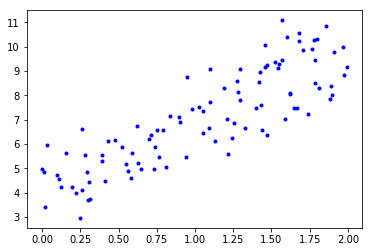

In [68]:
# Mostly linear data
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.show()

In [69]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.07546708],
       [2.84726619]])

In [70]:
X_new = np.array([[0], [2]]) 
#array([[0],
       #[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
#array([[1., 0.],
#       [1., 2.]])
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07546708],
       [9.76999945]])

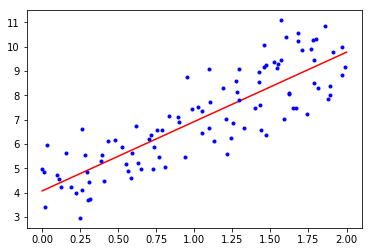

In [71]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [72]:
# Sklearn version
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,  lin_reg.coef_)
lin_reg.predict(X_new)

[4.07546708] [[2.84726619]]


array([[4.07546708],
       [9.76999945]])

In [73]:
# Implementation of Batch Gradient Descent
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.07546708],
       [2.84726619]])

In [74]:
#Implementation of Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameter
def learning_schedule(t):
    return t0 / (t+t1)
theta = np.random.randn(2,1) # random initalization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients
theta

array([[4.11166119],
       [2.80171931]])

In [75]:
# Sklearn SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.07356588]), array([2.84589291]))

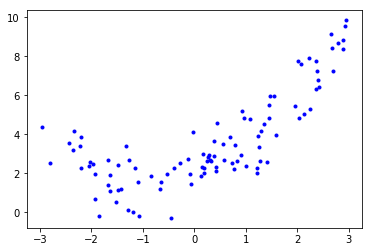

In [76]:
#Mostly Quadratic data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X,y,"b.")
plt.show()

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.19354884]
[-2.19354884  4.81165652]


[2.09511483] [[0.93213407 0.50211997]]


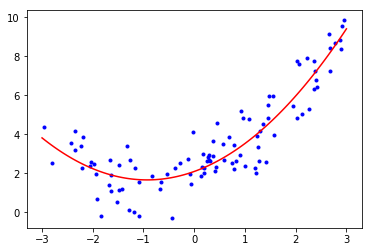

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_,lin_reg.coef_)
plt.plot(X,y,"b.")
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-",)
plt.show()

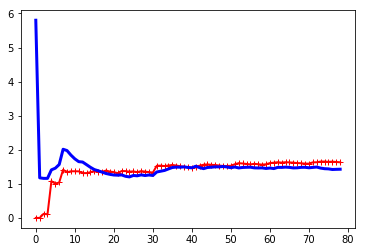

In [79]:
#Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y) # Error on y axis, training test size on X. This model is underfitting

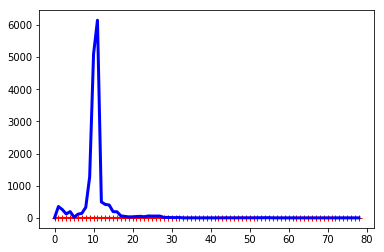

In [80]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y) # This one is sllightly overfitting

In [81]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") # Matrix factorization technique by André-Louis Cholesky
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.98657312]])

In [82]:
sgd_reg = SGDRegressor(penalty='l2') #This is ridge regression, the penalty hyperparameter tells SGD to add a regularization term (more description in book)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.33351284])

In [83]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.94255754])

In [84]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1 ratio = r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.94143])

In [85]:
# Early stopping, No data is currently here
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scalar', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,warm_start=True,penalty=None, # Warm start continues from where it left off
                      learning_rate="constant",eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [87]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris-Virgincia else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names']


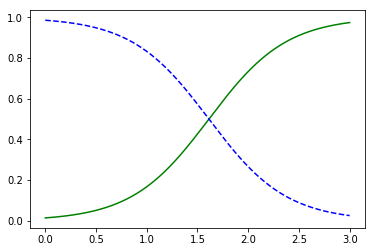

In [88]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virgincia")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virgincia")

In [89]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [90]:
X = iris["data"][:, (2,3)] # Petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.33134076e-07 5.75276067e-02 9.42471760e-01]]
